In [1]:
import pandas as pd
import numpy as np
import random
import re as re
import datetime as dt

In [2]:
# Loading a csv file with dates for an arbitrary year 2021 I quickly created in Excel.
# It excludes January 1st and 2nd, as well as December 24th-31st imitating clinic's closure for Christmas and New Year.

app = pd.read_csv('C:\\Users\\laimi\\Desktop\\SQL dash\\mock_data\\app_dates.csv')
app['app_date'] = pd.to_datetime(app['app_date'], format='%d/%m/%Y')
app

,app_date,weekday
0,2021-01-03,Sunday
1,2021-01-04,Monday
2,2021-01-05,Tuesday
3,2021-01-06,Wednesday
4,2021-01-07,Thursday
...,...,...
350,2021-12-19,Sunday
351,2021-12-20,Monday
352,2021-12-21,Tuesday
353,2021-12-22,Wednesday


In [3]:
# Loading a rota table specifying randomly chosen regular shifts for 10 employees (also from Excel)

shift = pd.read_csv('C:\\Users\\laimi\\Desktop\\SQL dash\\mock_data\\shift_sketch.csv', index_col='shift')
shift

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
shift,,,,,,,
am0,emp_001,emp_003,emp_001,emp_003,emp_001,emp_003,emp_003
pm0,emp_001,emp_007,emp_001,emp_007,emp_001,emp_003,emp_003
am1,emp_002,emp_002,emp_002,emp_002,emp_002,emp_007,emp_007
pm1,emp_004,emp_004,emp_004,emp_004,emp_004,emp_007,emp_007
am2,emp_008,emp_005,emp_010,emp_005,emp_008,emp_008,emp_005
pm2,emp_009,emp_005,emp_008,emp_005,emp_009,emp_008,emp_005
am3,emp_006,emp_006,emp_006,emp_006,emp_006,emp_009,emp_009
pm3,emp_006,emp_009,emp_009,emp_010,emp_006,emp_010,emp_010


In [4]:
# Loading a table with data regarding treatments offered.

treatments = pd.read_csv("C:\\Users\\laimi\\Desktop\\SQL dash\\mock_data\\treatment.csv")
treatments

,id,treatment_name,length,price
0,rol_30,rolfing,30,40
1,rol_45,rolfing,45,55
2,rol_60,rolfing,60,70
3,rol_90,rolfing,90,100
4,acu_45,acupuncture,45,55
5,acu_60,acupuncture,60,70
6,acu_90,acupuncture,90,100
7,spo_30,sports massage,30,35
8,spo_45,sports massage,45,50
9,spo_60,sports massage,60,65


In [5]:
# I will assign a random popularity rating for each treatment to create 'booking trends'

for i in range (0, len(treatments)):
    treatments.loc[i, 'rating'] = random.choice([.3, .4, .5, .6, .7, .8, .9])
    
treatments

,id,treatment_name,length,price,rating
0,rol_30,rolfing,30,40,0.4
1,rol_45,rolfing,45,55,0.5
2,rol_60,rolfing,60,70,0.6
3,rol_90,rolfing,90,100,0.6
4,acu_45,acupuncture,45,55,0.8
5,acu_60,acupuncture,60,70,0.7
6,acu_90,acupuncture,90,100,0.6
7,spo_30,sports massage,30,35,0.4
8,spo_45,sports massage,45,50,0.3
9,spo_60,sports massage,60,65,0.6


In [6]:
# Initiating a list with employee numbers

emps = ['emp_001', 'emp_002', 'emp_003', 'emp_004', 'emp_005', 'emp_006', 'emp_007', 'emp_008', 'emp_009', 'emp_010']

In [7]:
# Extending the appointment df by adding 8 'shift' columns - four am shifts and four pm shifts
# which simulate 4 treatment rooms.
# For each shift I add the correct employee by looking up their ID and weekday in the 'shift' df

for room in range(4):
    for time in ('am', 'pm'):
        app[f'{time}{room}'] = app['weekday'].apply(lambda x: shift.loc[f'{time}{room}', x])

In [8]:
# Transposing the dataframe

app_melt = app.melt(id_vars=['app_date', 'weekday']).sort_values(['app_date', 'value', 'variable'])
app_melt.rename(columns={'variable':'shift', 'value':'emp'}, inplace=True)
app_melt

,app_date,weekday,shift,emp
0,2021-01-03,Sunday,am0,emp_003
355,2021-01-03,Sunday,pm0,emp_003
1420,2021-01-03,Sunday,am2,emp_005
1775,2021-01-03,Sunday,pm2,emp_005
710,2021-01-03,Sunday,am1,emp_007
...,...,...,...,...
1774,2021-12-23,Thursday,am2,emp_005
2129,2021-12-23,Thursday,pm2,emp_005
2484,2021-12-23,Thursday,am3,emp_006
709,2021-12-23,Thursday,pm0,emp_007


# Holidays

Here I will further expand the appointment dataframe by assigning holidays and covers for all employees.
The basic structure is:

In [9]:
# create holiday df
# iterate through employees. For each employee:
#     select holiday length (2 -3weeks)
#     select holiday start date
#     add holiday days to holiday df
#     iterate through days:
#         replace employee on holidays with a random cover_employee if that day is not in their holidays 
#         and if they're not already working

In [10]:
# Initiating a df to keep holiday data
holidays = pd.DataFrame(data={'days':''}, index=emps)

# Iterating though employee list to assign holidays to all
for emp in emps:
    
    # PART 1: ADDING HOLIDAYS
    # Selecting random month, while favoring summertime
    months = [*range(1,13)]
    month_probs = [.03, .01, .01, .05, .15, .2, .2, .15, .05, .02, .01, .03]
    month = ''.join(map(str, random.choices(months, month_probs, k=1)))

    # Selecting random start day
    start_day = random.choice([*range(1, 29)])

    # Selecting holiday length between 2-3 weeks
    length = random.choice(*[range(14, 22)])

    # Combining selected month and day into a start date in correct format
    start_date = str(start_day) + '/' + month + '/' + '2021'
    start_date = dt.datetime.strptime(start_date, '%d/%m/%Y')

    # Initiating a list to add holidays day by day
    hol_days = []

    # Adding holidays to the list day by day
    for i in range(0, length+1):
        h_day = start_date + dt.timedelta(days=i)
        hol_days.append(str(h_day))

    # Converting holiday list to a string and adding data to the holiday df
    holidays.at[emp, 'days'] = ', '.join(hol_days)

    # PART 2: ASSIGNING COVER
    # Iterating through emp's holiday days and assigning a cover for each.
    # Criteria 1: the cover should not be on holidays themselves
    # Criteria 2: the cover should not be already working at the same shift
    for date in hol_days:
        
        # Changing holiday date format to find a matching day in appointments df
        date_match = dt.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
        
        # Retrieving shifts in need of cover for each day of holidyas
        shift_list = app_melt[(app_melt['app_date']==date_match) & (app_melt['emp']==emp)]['shift'].values 

        for shft in shift_list:

            # List of employees unable to cover
            same_shift_emps = app_melt[(app_melt['app_date']==date_match) & (app_melt['shift'].str[:2]==shft[:2])]['emp'].values
            
            # List of employees able to cover - NOT on holidays at the same time or already working
            cover_emp_list = [emp for emp in emps if date not in holidays.loc[emp, 'days'].split(', ')
                              if emp not in same_shift_emps]
            
            # Assigning a random cover based on the two conditions
            app_melt.loc[app_melt[app_melt['app_date']==date_match].index, 'emp'] = random.choice(cover_emp_list)

In [11]:
# A function to transpose and clean up dataframes into a desired format
def expand_melt(df, col_to_split, value_rename):
    
    new_df = pd.concat([df, df[col_to_split].str.split(', ', expand=True)], axis=1)
    new_df = new_df.melt(id_vars=df.columns)
    new_df.drop(columns=[col_to_split, 'variable'], inplace=True)
    new_df.rename(columns={'value':value_rename}, inplace=True)
    new_df = new_df.drop(index=new_df[new_df[value_rename].isna()].index)
    
    return new_df

In [12]:
holidays.reset_index(inplace=True)

In [13]:
holiday_clean = expand_melt(holidays, 'days', 'date')

In [14]:
holiday_clean

,index,date
0,emp_001,2021-05-04 00:00:00
1,emp_002,2021-09-08 00:00:00
2,emp_003,2021-08-21 00:00:00
3,emp_004,2021-07-25 00:00:00
4,emp_005,2021-01-05 00:00:00
...,...,...
202,emp_003,2021-09-10 00:00:00
203,emp_004,2021-08-14 00:00:00
209,emp_010,2021-07-14 00:00:00
213,emp_004,2021-08-15 00:00:00


In [15]:
# Reformatting the date and removing time
holiday_clean['date'] = pd.to_datetime(holiday_clean['date'], format='%Y-%m-%d')

In [16]:
holiday_clean.rename(columns={'index':'emp_id'}, inplace=True)

In [17]:
# Checking how holidays were assigned
holiday_clean['emp_id'].value_counts()

emp_004    22
emp_010    22
emp_003    21
emp_009    20
emp_001    19
emp_002    18
emp_007    17
emp_005    16
emp_008    16
emp_006    15
Name: emp_id, dtype: int64

In [18]:
holiday_clean = holiday_clean.sort_values(by=['date', 'emp_id']).reset_index(drop=True)

In [19]:
holiday_clean

,emp_id,date
0,emp_005,2021-01-05
1,emp_005,2021-01-06
2,emp_005,2021-01-07
3,emp_005,2021-01-08
4,emp_005,2021-01-09
...,...,...
181,emp_002,2021-09-21
182,emp_002,2021-09-22
183,emp_002,2021-09-23
184,emp_002,2021-09-24


In [20]:
holiday_clean['emp_id'].isna().count()

186

In [21]:
holiday_clean = holiday_clean.drop(index=holiday_clean[holiday_clean['emp_id'].isna()].index)

In [22]:
# A function to generate unique IDs, which I'll need to do a few times.
# It allows id generation from index (e.g. for all appointments starting from the 1st one)
# or from already existing number - e.g. client's number.

def add_id(df, prefix, use_index, id_col='id'):
    for i in range(0, len(df)):
        if use_index is True:
            num = i+1
        else:
            num = df.loc[i, id_col]
        if num < 10:
            value = prefix + '0000' + str(num)
        elif num < 100:
            value = prefix + '000' + str(num)
        elif num < 1000:
            value = prefix + '00' + str(num)
        elif num < 10000:
            value = prefix + '0' + str(num)
        else:
            value = prefix + str(num)
        df.loc[i, id_col] = value

In [23]:
add_id(holiday_clean, 'hol_', True)

In [24]:
holiday_clean

,emp_id,date,id
0,emp_005,2021-01-05,hol_00001
1,emp_005,2021-01-06,hol_00002
2,emp_005,2021-01-07,hol_00003
3,emp_005,2021-01-08,hol_00004
4,emp_005,2021-01-09,hol_00005
...,...,...,...
181,emp_002,2021-09-21,hol_00182
182,emp_002,2021-09-22,hol_00183
183,emp_002,2021-09-23,hol_00184
184,emp_002,2021-09-24,hol_00185


In [25]:
# Although holidays were added 'in full', we might be interested
# in the actual number of regular shifts that employee is unavailable for
for i in range(0, len(holiday_clean)):
    weekday = pd.Timestamp(holiday_clean.loc[i, 'date']).day_name()
    if holiday_clean.loc[i, 'emp_id'] in list(shift[weekday]):
        holiday_clean.loc[i, 'reg_shift'] = 'yes'
    else:
        holiday_clean.loc[i, 'reg_shift'] = 'no'

In [26]:
holiday_clean

,emp_id,date,id,reg_shift
0,emp_005,2021-01-05,hol_00001,yes
1,emp_005,2021-01-06,hol_00002,no
2,emp_005,2021-01-07,hol_00003,yes
3,emp_005,2021-01-08,hol_00004,no
4,emp_005,2021-01-09,hol_00005,no
...,...,...,...,...
181,emp_002,2021-09-21,hol_00182,yes
182,emp_002,2021-09-22,hol_00183,yes
183,emp_002,2021-09-23,hol_00184,yes
184,emp_002,2021-09-24,hol_00185,yes


# Appointments

In [27]:
# Initiating a list of therapies

therapies = list(set(treatments['treatment_name']))

In [28]:
therapies

['indian head massage',
 'personal training',
 'thai massage',
 'physiotherapy',
 'sports massage',
 'acupuncture',
 'rolfing',
 'pilates',
 'craniosacral therapy']

In [29]:
# Assigning each therapist three random qualifications and popularity ratings

emp_quals = pd.DataFrame(data={'qual':'', 'rating':''}, index=emps)
emp_quals['qual'] = (emp_quals['qual'].apply(lambda x: ', '.join(random.sample(therapies, k=3))))

In [30]:
for i in range(0, len(emp_quals)):
    emp_quals.iloc[i, 1] = random.choice([1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [31]:
emp_quals

,qual,rating
emp_001,"acupuncture, personal training, thai massage",1.6
emp_002,"craniosacral therapy, thai massage, acupuncture",1.5
emp_003,"rolfing, personal training, thai massage",1.9
emp_004,"indian head massage, pilates, thai massage",1.9
emp_005,"acupuncture, craniosacral therapy, rolfing",1.9
emp_006,"craniosacral therapy, indian head massage, tha...",1.5
emp_007,"physiotherapy, personal training, sports massage",1.6
emp_008,"acupuncture, craniosacral therapy, indian head...",1.7
emp_009,"craniosacral therapy, physiotherapy, personal ...",1.7
emp_010,"personal training, rolfing, pilates",1.4


In [32]:
# A function that will generate fake appointment data based on weekday, shift, and employee

def daily_apps(weekday, shift, emp_no):
    
    weekday = str(weekday)
    shift = str(shift)
    emp_no = str(emp_no)
    
    # selecting shift start and end time based on weekday
    # Weekday am shift is 9am-3pm, and pm shift is 3pm-9pm
    # Weekend am shift is 10am-3pm, and pm shift is 3pm-7pm
    if weekday in ['Saturday', 'Sunday']:
        if shift[0:2] == 'am':
            start_time = dt.datetime(2021, 1, 1, 10, 0)
            end_time = dt.datetime(2021, 1, 1, 15, 0)
        else:
            start_time = dt.datetime(2021, 1, 1, 15, 0)
            end_time = dt.datetime(2021, 1, 1, 19, 0)
    else:
        if shift[0:2] == 'am':
            start_time = dt.datetime(2021, 1, 1, 9, 0)
            end_time = dt.datetime(2021, 1, 1, 15, 0)
        else:
            start_time = dt.datetime(2021, 1, 1, 15, 0)
            end_time = dt.datetime(2021, 1, 1, 21, 0)
     
    # New variable 'time' will indicate the start of each treatment or break.
    # Initially it is set as clinic's opening time, and then will have time added
    # according to appointment's length.
    time = start_time
    
    # Selecting a list of therapies an employee can provide
    app_list = emp_quals.loc[emp_no, 'qual']
    app_list = app_list.split(', ')
    
    # Setting the probability level of a booking based on shift time (am vs pm) and empployee rating.
    # Am shifts will have a higher chance of booking by default, and therapist's own rating
    # will increase the chance accordingly
    emp_rating = emp_quals.loc[emp_no, 'rating']
    am_prob = [.7, .3]
    pm_prob = [.55, .45]
    
    if shift[0:2] == 'am':
        shft_prob = np.array(am_prob)*emp_rating
    else:
        shft_prob = np.array(pm_prob)*emp_rating
    
    # A list I will add generated booking data to 
    schedule = []
    
    # A loop that will add a booking or a break on a schedule until the shift ends
    while True:
        # Choosing a booking or a break based on probabilities set earlier
        app_or_break = ''.join(random.choices(['app', 'brk'], shft_prob, k=1))

        # Selecting break's length
        if app_or_break == 'brk':
            mins = random.choice([15, 30, 45, 60])
            add_time = dt.timedelta(minutes=mins)
        # Selecting treatments and their lengths that a therapist can provide
        else:
            app_ids = list(treatments[treatments['treatment_name'].isin(app_list)]['id'])
            app_prob = list(treatments[treatments['treatment_name'].isin(app_list)]['rating'])
            booking = ''.join(random.choices(app_ids, app_prob, k=1))

            mins = int(treatments[treatments['id'] == booking]['length'])
            add_time = dt.timedelta(minutes=mins)
            
        # 'Turning' the clock forward in a day by adding length of treatment/break to initial start time
        time = time + add_time
        
        # Continuing the loop if we added a break, as the dataframe will only have appointments in it
        if app_or_break =='brk':
            continue
        # Adding appointment's info to the schedule - starting time and name
        else:
            schedule.append(str((time - add_time).time()) + ' ' + booking)
        
        # If last added appointment went over closing time, we remove it and break the loop
        if time > end_time:
            schedule.pop(-1)
            break
    
    # Returning the schedule as a string
    return ', '.join(schedule)

In [33]:
# Applying the function to each day of the appointment dataframe thus generating schedule
for i in range(0, len(app_melt)):
    app_melt.at[i, 'apps'] = daily_apps(app_melt.loc[i, 'weekday'], app_melt.loc[i, 'shift'], app_melt.loc[i, 'emp'])

In [34]:
app_melt

,app_date,weekday,shift,emp,apps
0,2021-01-03,Sunday,am0,emp_003,"10:00:00 rol_45, 10:45:00 rol_45, 11:45:00 pet..."
355,2021-01-03,Sunday,pm0,emp_003,"15:00:00 rol_45, 15:45:00 rol_60, 16:45:00 rol_45"
1420,2021-01-03,Sunday,am2,emp_005,"10:00:00 rol_30, 10:30:00 acu_60, 11:30:00 rol_90"
1775,2021-01-03,Sunday,pm2,emp_005,"15:00:00 rol_45, 15:45:00 rol_45, 16:30:00 rol..."
710,2021-01-03,Sunday,am1,emp_007,"10:00:00 spo_60, 12:00:00 phy_90, 13:30:00 spo_60"
...,...,...,...,...,...
1774,2021-12-23,Thursday,am2,emp_005,"09:00:00 rol_30, 09:30:00 acu_90, 11:00:00 acu..."
2129,2021-12-23,Thursday,pm2,emp_005,"15:00:00 rol_30, 15:30:00 cra_45, 17:00:00 cra..."
2484,2021-12-23,Thursday,am3,emp_006,"09:00:00 ihm_90, 11:00:00 tha_60, 13:30:00 tha_60"
709,2021-12-23,Thursday,pm0,emp_007,"16:00:00 phy_90, 17:30:00 pet_90, 19:00:00 spo_90"


In [35]:
# Checking for empty schedules
app_melt[app_melt['apps']==''].count()

app_date    7
weekday     7
shift       7
emp         7
apps        7
dtype: int64

In [36]:
# Seems like some schedules were generated empty. I will drop them
app_melt = app_melt.drop(index=app_melt[app_melt['apps']==''].index)

In [37]:
# Applying a function defined earlier to clean up and transpsoe df
schedule_df = expand_melt(app_melt, 'apps', 'details')

In [38]:
schedule_df2 = pd.concat([schedule_df, schedule_df['details'].str.split(' ', expand=True)], axis=1)
schedule_df2.rename(columns={0:'app_time', 1:'treatment_id', 'emp':'emp_id'}, inplace=True)
schedule_df2.drop(columns='details', inplace=True)

In [39]:
schedule_df2 = schedule_df2.sort_values(by=['app_date', 'app_time', 'emp_id',]).reset_index(drop=True)

In [40]:
# The schedule is starting to take up shape
schedule_df2

,app_date,weekday,shift,emp_id,app_time,treatment_id
0,2021-01-03,Sunday,am0,emp_003,10:00:00,rol_45
1,2021-01-03,Sunday,am2,emp_005,10:00:00,rol_30
2,2021-01-03,Sunday,am1,emp_007,10:00:00,spo_60
3,2021-01-03,Sunday,am3,emp_009,10:15:00,phy_90
4,2021-01-03,Sunday,am2,emp_005,10:30:00,acu_60
...,...,...,...,...,...,...
9921,2021-12-23,Thursday,pm1,emp_004,18:00:00,pil_90
9922,2021-12-23,Thursday,pm2,emp_005,18:30:00,rol_60
9923,2021-12-23,Thursday,pm0,emp_007,19:00:00,spo_90
9924,2021-12-23,Thursday,pm1,emp_004,19:30:00,ihm_60


In [41]:
# I will now assign clients to the appointments from a list of 2500 unique ones.
clients = [*range(1, 2500)]

In [70]:
for i in range(0, len(schedule_df2)):
    schedule_df2.loc[i, 'client_id'] = np.random.choice(clients)

schedule_df2['client_id'] = schedule_df2['client_id'].astype(int)

In [71]:
schedule_df2

,app_date,emp_id,app_time,treatment_id,client_id,id
0,2021-01-03,emp_003,10:00:00,rol_45,2054,app_00001
1,2021-01-03,emp_005,10:00:00,rol_30,1749,app_00002
2,2021-01-03,emp_007,10:00:00,spo_60,378,app_00003
3,2021-01-03,emp_009,10:15:00,phy_90,1024,app_00004
4,2021-01-03,emp_005,10:30:00,acu_60,2121,app_00005
...,...,...,...,...,...,...
9921,2021-12-23,emp_004,18:00:00,pil_90,2158,app_09922
9922,2021-12-23,emp_005,18:30:00,rol_60,483,app_09923
9923,2021-12-23,emp_007,19:00:00,spo_90,669,app_09924
9924,2021-12-23,emp_004,19:30:00,ihm_60,1676,app_09925


In [72]:
# Adding client ID
add_id(schedule_df2, 'cl_', False, 'client_id')

In [73]:
# Adding appointment ID
add_id(schedule_df2, 'app_', True)

In [74]:
schedule_df2

,app_date,emp_id,app_time,treatment_id,client_id,id
0,2021-01-03,emp_003,10:00:00,rol_45,cl_02054,app_00001
1,2021-01-03,emp_005,10:00:00,rol_30,cl_01749,app_00002
2,2021-01-03,emp_007,10:00:00,spo_60,cl_00378,app_00003
3,2021-01-03,emp_009,10:15:00,phy_90,cl_01024,app_00004
4,2021-01-03,emp_005,10:30:00,acu_60,cl_02121,app_00005
...,...,...,...,...,...,...
9921,2021-12-23,emp_004,18:00:00,pil_90,cl_02158,app_09922
9922,2021-12-23,emp_005,18:30:00,rol_60,cl_00483,app_09923
9923,2021-12-23,emp_007,19:00:00,spo_90,cl_00669,app_09924
9924,2021-12-23,emp_004,19:30:00,ihm_60,cl_01676,app_09925


In [75]:
# For a quick visualisation of 'regularity' of some customers, i.e. number of visits
import matplotlib.pyplot as plt
%matplotlib inline

(array([550., 511., 466., 652., 153.,  73.,  45.,   0.,   2.,   1.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

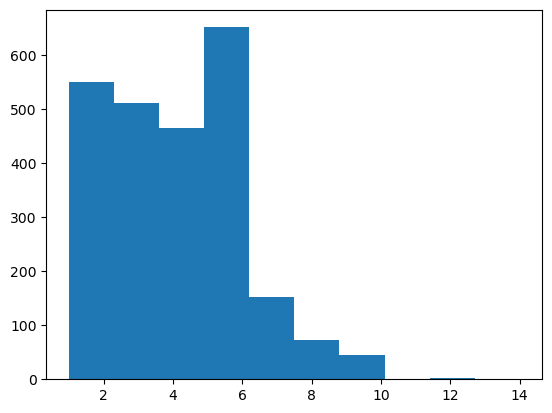

In [76]:
# Checking the distribution of number of visits

plt.hist(schedule_df2['client_id'].value_counts())

# Shifts

In [49]:
# Creating a dataframe to store data about employee shifts throughout the year
final_shifts = schedule_df2.drop(columns=['app_time', 'treatment_id', 'client_id', 'id'])
final_shifts

,app_date,weekday,shift,emp_id
0,2021-01-03,Sunday,am0,emp_003
1,2021-01-03,Sunday,am2,emp_005
2,2021-01-03,Sunday,am1,emp_007
3,2021-01-03,Sunday,am3,emp_009
4,2021-01-03,Sunday,am2,emp_005
...,...,...,...,...
9921,2021-12-23,Thursday,pm1,emp_004
9922,2021-12-23,Thursday,pm2,emp_005
9923,2021-12-23,Thursday,pm0,emp_007
9924,2021-12-23,Thursday,pm1,emp_004


In [50]:
final_shifts = final_shifts.drop_duplicates().reset_index(drop=True)

In [51]:
final_shifts

,app_date,weekday,shift,emp_id
0,2021-01-03,Sunday,am0,emp_003
1,2021-01-03,Sunday,am2,emp_005
2,2021-01-03,Sunday,am1,emp_007
3,2021-01-03,Sunday,am3,emp_009
4,2021-01-03,Sunday,pm0,emp_003
...,...,...,...,...
2828,2021-12-23,Thursday,am3,emp_006
2829,2021-12-23,Thursday,pm1,emp_004
2830,2021-12-23,Thursday,pm2,emp_005
2831,2021-12-23,Thursday,pm3,emp_010


In [52]:
# I want to specify start time - end time
for i in range(0, len(final_shifts)):
    if final_shifts.loc[i, 'weekday'] in ['Sunday', 'Saturday']:
        if final_shifts.loc[i, 'shift'][:2] == 'am':
            start_time = '10:00:00'
            end_time = '15:00:00'
        else:
            start_time = '15:00:00'
            end_time = '19:00:00'
    else:
        if final_shifts.loc[i, 'shift'][:2] == 'am':
            start_time = '09:00:00'
            end_time = '15:00:00'
        else:
            start_time = '15:00:00'
            end_time = '21:00:00'
    final_shifts.loc[i, 'start_time'] = start_time
    final_shifts.loc[i, 'end_time'] = end_time

In [53]:
final_shifts.drop(columns=['shift', 'weekday'], inplace=True)

In [54]:
final_shifts.rename(columns={'app_date':'shift_date'}, inplace=True)

In [55]:
final_shifts

,shift_date,emp_id,start_time,end_time
0,2021-01-03,emp_003,10:00:00,15:00:00
1,2021-01-03,emp_005,10:00:00,15:00:00
2,2021-01-03,emp_007,10:00:00,15:00:00
3,2021-01-03,emp_009,10:00:00,15:00:00
4,2021-01-03,emp_003,15:00:00,19:00:00
...,...,...,...,...
2828,2021-12-23,emp_006,09:00:00,15:00:00
2829,2021-12-23,emp_004,15:00:00,21:00:00
2830,2021-12-23,emp_005,15:00:00,21:00:00
2831,2021-12-23,emp_010,15:00:00,21:00:00


In [56]:
# Adding shift id
add_id(final_shifts, 'shft_', True)

In [57]:
final_shifts

,shift_date,emp_id,start_time,end_time,id
0,2021-01-03,emp_003,10:00:00,15:00:00,shft_00001
1,2021-01-03,emp_005,10:00:00,15:00:00,shft_00002
2,2021-01-03,emp_007,10:00:00,15:00:00,shft_00003
3,2021-01-03,emp_009,10:00:00,15:00:00,shft_00004
4,2021-01-03,emp_003,15:00:00,19:00:00,shft_00005
...,...,...,...,...,...
2828,2021-12-23,emp_006,09:00:00,15:00:00,shft_02829
2829,2021-12-23,emp_004,15:00:00,21:00:00,shft_02830
2830,2021-12-23,emp_005,15:00:00,21:00:00,shft_02831
2831,2021-12-23,emp_010,15:00:00,21:00:00,shft_02832


In [58]:
# Won't need the 'weekday' or 'shift' columns anymore
schedule_df2.drop(columns=['weekday', 'shift'], inplace=True)

In [59]:
add_id(schedule_df2.sort_values(by=['app_date', 'app_time', 'emp_id']), 'app_', True)

In [60]:
schedule_df2

,app_date,emp_id,app_time,treatment_id,client_id,id
0,2021-01-03,emp_003,10:00:00,rol_45,cl_00950,app_00001
1,2021-01-03,emp_005,10:00:00,rol_30,cl_01813,app_00002
2,2021-01-03,emp_007,10:00:00,spo_60,cl_01085,app_00003
3,2021-01-03,emp_009,10:15:00,phy_90,cl_02482,app_00004
4,2021-01-03,emp_005,10:30:00,acu_60,cl_01929,app_00005
...,...,...,...,...,...,...
9921,2021-12-23,emp_004,18:00:00,pil_90,cl_02017,app_09922
9922,2021-12-23,emp_005,18:30:00,rol_60,cl_02171,app_09923
9923,2021-12-23,emp_007,19:00:00,spo_90,cl_02015,app_09924
9924,2021-12-23,emp_004,19:30:00,ihm_60,cl_01858,app_09925


In [61]:
holiday_clean

,emp_id,date,id,reg_shift
0,emp_005,2021-01-05,hol_00001,yes
1,emp_005,2021-01-06,hol_00002,no
2,emp_005,2021-01-07,hol_00003,yes
3,emp_005,2021-01-08,hol_00004,no
4,emp_005,2021-01-09,hol_00005,no
...,...,...,...,...
181,emp_002,2021-09-21,hol_00182,yes
182,emp_002,2021-09-22,hol_00183,yes
183,emp_002,2021-09-23,hol_00184,yes
184,emp_002,2021-09-24,hol_00185,yes


In [62]:
# Saving csv files
holiday_clean.to_csv('holidays.csv', index=False)
schedule_df2.to_csv('appointment.csv', index=False)
final_shifts.to_csv('shift.csv', index=False)